# IPL Dataset Analysis

## Problem Statement
We want to know as to what happens during an IPL match which raises several questions in our mind with our limited knowledge about the game called cricket on which it is based. This analysis is done to know as which factors led one of the team to win and how does it matter.

## About the Dataset :
The Indian Premier League (IPL) is a professional T20 cricket league in India contested during April-May of every year by teams representing Indian cities. It is the most-attended cricket league in the world and ranks sixth among all the sports leagues. It has teams with players from around the world and is very competitive and entertaining with a lot of close matches between teams.

The IPL and other cricket related datasets are available at [cricsheet.org](https://cricsheet.org). Feel free to visit the website and explore the data by yourself as exploring new sources of data is one of the interesting activities a data scientist gets to do.

## About the dataset:
Snapshot of the data you will be working on:<br>
<br>
The dataset 136522 data points and 23 features<br>

|Features|Description|
|-----|-----|
|match_code|Code pertaining to individual match|
|date|Date of the match played|
|city|City where the match was played|
|venue|Stadium in that city where the match was played|
|team1|team1|
|team2|team2|
|toss_winner|Who won the toss out of two teams|
|toss_decision|toss decision taken by toss winner|
|winner|Winner of that match between two teams|
|win_type|How did the team won(by wickets or runs etc.)|
|win_margin|difference with which the team won| 
|inning|inning type(1st or 2nd)|
|delivery|ball delivery|
|batting_team|current team on batting|
|batsman|current batsman on strike|
|non_striker|batsman on non-strike|
|bowler|Current bowler|
|runs|runs scored|
|extras|extra run scored|
|total|total run scored on that delivery including runs and extras|
|extras_type|extra run scored by wides or no ball or legby|
|player_out|player that got out|
|wicket_kind|How did the player got out|
|wicket_fielders|Fielder who caught out the player by catch|



## Load the data

In [1]:
# Read the data using pandas module.
import pandas as pd
import numpy as np

df_ipl = pd.read_csv('../data/ipl_data.csv')
df_ipl.shape

(136522, 24)

In [3]:
df_ipl.iloc[0]

match_code                        392203
date                          2009-05-01
city                         East London
venue                       Buffalo Park
team1              Kolkata Knight Riders
team2                     Mumbai Indians
toss_winner               Mumbai Indians
toss_decision                        bat
winner                    Mumbai Indians
win_type                            runs
win_margin                             9
inning                                 1
delivery                             0.1
batting_team              Mumbai Indians
batsman                    ST Jayasuriya
non_striker                 SR Tendulkar
bowler                          I Sharma
runs                                   0
extras                                 1
total                                  1
extras_type                        wides
player_out                           NaN
wicket_kind                          NaN
wicket_fielders                      NaN
Name: 0, dtype: 

## There are matches being played all around the world. Find the list of unique cities where matches are being played throughout the world.

In [4]:
print('Cities these matches were played at',
      df_ipl.city.unique())

Cities these matches were played at ['East London' 'Port Elizabeth' 'Centurion' 'neutral_venue' 'Chennai'
 'Jaipur' 'Kolkata' 'Delhi' 'Chandigarh' 'Hyderabad' 'Ranchi' 'Mumbai'
 'Bangalore' 'Dharamsala' 'Pune' 'Rajkot' 'Durban' 'Cuttack' 'Cape Town'
 'Ahmedabad' 'Johannesburg' 'Visakhapatnam' 'Abu Dhabi' 'Raipur' 'Kochi'
 'Kimberley' 'Nagpur' 'Bloemfontein' 'Indore' 'Kanpur']


## Find columns containing null values if any.

In [10]:
df_ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136522 entries, 0 to 136521
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   match_code       136522 non-null  int64  
 1   date             136522 non-null  object 
 2   city             136522 non-null  object 
 3   venue            136522 non-null  object 
 4   team1            136522 non-null  object 
 5   team2            136522 non-null  object 
 6   toss_winner      136522 non-null  object 
 7   toss_decision    136522 non-null  object 
 8   winner           134704 non-null  object 
 9   win_type         134704 non-null  object 
 10  win_margin       134704 non-null  float64
 11  inning           136522 non-null  int64  
 12  delivery         136522 non-null  float64
 13  batting_team     136522 non-null  object 
 14  batsman          136522 non-null  object 
 15  non_striker      136522 non-null  object 
 16  bowler           136522 non-null  obje

In [15]:
nulls = df_ipl.isnull().sum()
print("Columns with null values are",
      nulls[nulls>0].index.to_list())

Columns with null values are ['winner', 'win_type', 'win_margin', 'extras_type', 'player_out', 'wicket_kind', 'wicket_fielders']


## Matches are played throughout the world in different countries but they may or may not have multiple venues(stadiums where matches are played). Find the top 5 venues where the most matches are played.


In [45]:
city_venue = df_ipl.groupby('city').venue.nunique()
multi_stadium_cities = city_venue[city_venue>1].index.to_list()

df_ipl.loc[df_ipl.city.isin(multi_stadium_cities),].groupby('city').venue.unique().to_dict()
#.value_counts().index.to_list()

{'Chandigarh': array(['Punjab Cricket Association Stadium, Mohali',
        'Punjab Cricket Association IS Bindra Stadium, Mohali'],
       dtype=object),
 'Mumbai': array(['Wankhede Stadium', 'Brabourne Stadium',
        'Dr DY Patil Sports Academy'], dtype=object),
 'Pune': array(['Maharashtra Cricket Association Stadium',
        'Subrata Roy Sahara Stadium'], dtype=object),
 'neutral_venue': array(['Dubai International Cricket Stadium', 'Sharjah Cricket Stadium'],
       dtype=object)}

In [36]:
df_ipl.groupby(['city']).match_code.nunique().nlargest(5)

city
Mumbai       77
Bangalore    58
Kolkata      54
Delhi        53
Chennai      48
Name: match_code, dtype: int64

In [35]:
df_ipl.groupby(['city','venue']).match_code.nunique().nlargest(5)

city       venue                          
Bangalore  M Chinnaswamy Stadium              58
Kolkata    Eden Gardens                       54
Delhi      Feroz Shah Kotla                   53
Mumbai     Wankhede Stadium                   49
Chennai    MA Chidambaram Stadium, Chepauk    48
Name: match_code, dtype: int64

## Find out how the runs were scored that is the runs count frequency table( number of singles, doubles, boundaries, sixes etc were scored).

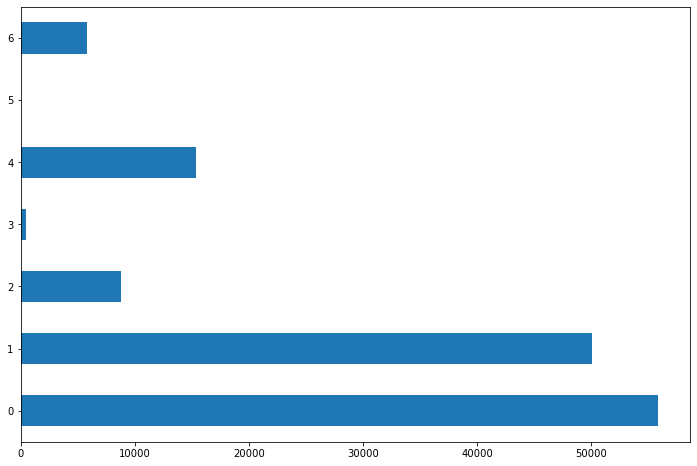

In [54]:
(df_ipl
 runs.value_counts(sort=False)
 .plot.barh(figsize=(12,8))
)

https://stackoverflow.com/a/30874820/8210613

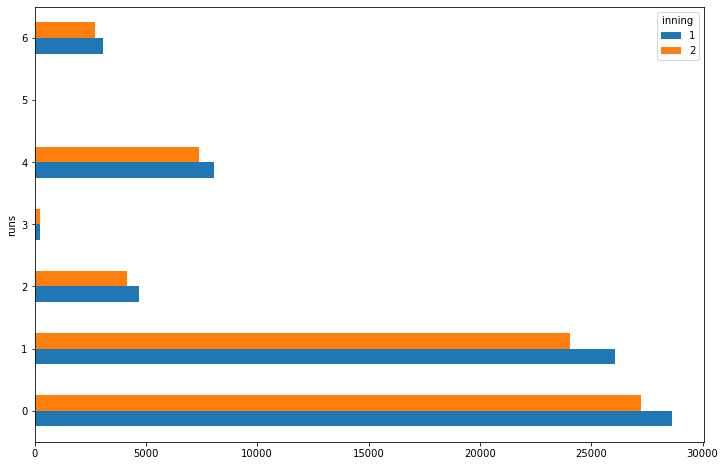

In [67]:

(df_ipl
 .groupby(['inning'])
 .runs.value_counts(sort=False)
 .unstack().T
 .plot.barh(figsize=(12,8))
)

## IPL seasons are held every year now let's look at our data and extract how many seasons and which year were they played?


In [73]:
df_ipl.date.astype('datetime64[ns]').dt.year

0         2009
1         2009
2         2009
3         2009
4         2009
          ... 
136517    2008
136518    2008
136519    2008
136520    2008
136521    2008
Name: date, Length: 136522, dtype: int64

In [78]:
df_ipl['year'] = df_ipl.date.apply(lambda row: row[:4])
df_ipl['year']

0         2009
1         2009
2         2009
3         2009
4         2009
          ... 
136517    2008
136518    2008
136519    2008
136520    2008
136521    2008
Name: year, Length: 136522, dtype: object

In [80]:
df_ipl.year.nunique()

9

In [85]:
df_ipl.year.sort_values().unique()

array(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016'], dtype=object)

## Find out the total number of matches played in each season also find the total number of runs scored in each season.


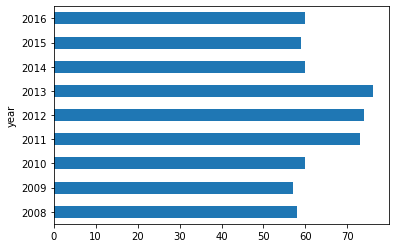

In [87]:
df_ipl.groupby('year').match_code.nunique().plot.barh()

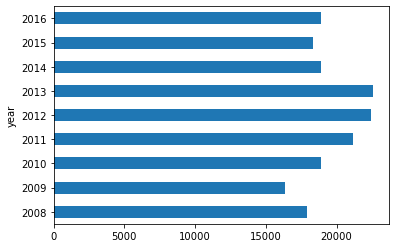

In [90]:
df_ipl.groupby('year').total.sum().plot.barh()

## There are teams which are high performing and low performing. Let's look at the aspect of performance of an individual team. Filter the data and aggregate the runs scored by each team. Display top 10 results which are having runs scored over 200.

In [98]:
total_scores = df_ipl.groupby(['year','match_code','inning','team1','team2','toss_winner','toss_decision']).total.sum().reset_index()
high_scores = total_scores[total_scores.total>200]
high_scores.nlargest(10,columns='total')

,year,match_code,inning,team1,team2,toss_winner,toss_decision,total
701,2013,598027,1,Royal Challengers Bangalore,Pune Warriors,Pune Warriors,field,263
1118,2016,980987,1,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,248
292,2010,419137,1,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,246
2,2008,335983,1,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,240
1002,2015,829795,1,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,235
472,2011,501260,1,Kings XI Punjab,Royal Challengers Bangalore,Kings XI Punjab,bat,232
398,2011,501223,1,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,231
851,2014,733987,1,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,231
1038,2016,980907,1,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,227
911,2014,734047,1,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,226


In [122]:
total_scores = df_ipl.groupby(['match_code','inning','team1','team2']).total.sum().reset_index()
high_scores = total_scores[total_scores.total>=200]
high_scores.nlargest(10,columns='total')

,match_code,inning,team1,team2,total
701,598027,1,Royal Challengers Bangalore,Pune Warriors,263
1118,980987,1,Royal Challengers Bangalore,Gujarat Lions,248
292,419137,1,Chennai Super Kings,Rajasthan Royals,246
2,335983,1,Kings XI Punjab,Chennai Super Kings,240
1002,829795,1,Mumbai Indians,Royal Challengers Bangalore,235
472,501260,1,Kings XI Punjab,Royal Challengers Bangalore,232
398,501223,1,Delhi Daredevils,Kings XI Punjab,231
851,733987,1,Kings XI Punjab,Chennai Super Kings,231
1038,980907,1,Royal Challengers Bangalore,Sunrisers Hyderabad,227
911,734047,1,Chennai Super Kings,Kings XI Punjab,226


## Chasing a 200+ target is difficulty in T-20 format. What are the chances that a team scoring runs above 200 in their 1st inning is chased by the opposition in 2nd inning.


In [123]:
high_scores1 = high_scores.loc[high_scores.inning==1,:]
high_scores2 = high_scores.loc[high_scores.inning==2,:]


(high_scores1.set_index('match_code').drop(columns='inning')
 .join(high_scores2.set_index('match_code')[['total']],
       lsuffix='_inn1',
       rsuffix='_inn2',
       how="inner")
)

,team1,team2,total_inn1,total_inn2
match_code,,,,
335983,Kings XI Punjab,Chennai Super Kings,240,207
335989,Chennai Super Kings,Mumbai Indians,208,202
335990,Deccan Chargers,Rajasthan Royals,214,217
336033,Chennai Super Kings,Rajasthan Royals,211,201
419107,Mumbai Indians,Rajasthan Royals,212,208
419112,Royal Challengers Bangalore,Kings XI Punjab,203,204
419137,Chennai Super Kings,Rajasthan Royals,246,223
419139,Kolkata Knight Riders,Kings XI Punjab,200,204
501223,Delhi Daredevils,Kings XI Punjab,231,202


In [124]:
high_score_matches = high_scores1.drop(columns='inning').merge(high_scores2[['match_code','total']],on='match_code',suffixes=('_inn1','_inn2'))

high_score_matches['is_score_chased'] = high_score_matches.total_inn2 > high_score_matches.total_inn1
high_score_matches.is_score_chased.value_counts(normalize=True).multiply(100).round(2)[True]


42.86

In [125]:
high_score_matches.is_score_chased.value_counts()

False    8
True     6
Name: is_score_chased, dtype: int64

## Every season has that one team which is outperforming others and is in great form. Which team has the highest win counts in their respective seasons ?



In [169]:
match_wise_data = df_ipl.drop_duplicates(subset = 'match_code', keep='first').reset_index(drop=True)
match_wise_data.groupby('year')['winner'].value_counts(ascending=False)

year  winner                 
2008  Rajasthan Royals           13
      Kings XI Punjab            10
      Chennai Super Kings         9
      Delhi Daredevils            7
      Mumbai Indians              7
                                 ..
2016  Kolkata Knight Riders       8
      Delhi Daredevils            7
      Mumbai Indians              7
      Rising Pune Supergiants     5
      Kings XI Punjab             4
Name: winner, Length: 76, dtype: int64

https://stackoverflow.com/a/22720517/8210613

In [168]:
(df_ipl
 .drop_duplicates(subset='match_code')
 .reset_index(drop=True)
 .groupby('year')
 .apply(lambda group: (group['winner'].value_counts().index[0],group['winner'].value_counts()[0] ))
)

year
2008         (Rajasthan Royals, 13)
2009         (Delhi Daredevils, 10)
2010           (Mumbai Indians, 11)
2011      (Chennai Super Kings, 11)
2012    (Kolkata Knight Riders, 12)
2013           (Mumbai Indians, 13)
2014          (Kings XI Punjab, 12)
2015           (Mumbai Indians, 10)
2016      (Sunrisers Hyderabad, 11)
dtype: object

https://stackoverflow.com/a/10762516/8210613

In [180]:
(df_ipl
 .drop_duplicates(subset='match_code')
 .reset_index(drop=True)
 .groupby('year')
 .apply(lambda group: pd.Series( (group['winner'].value_counts().index[0],group['winner'].value_counts()[0]),
                               index=['winner','count']))
)

,winner,count
year,,
2008,Rajasthan Royals,13
2009,Delhi Daredevils,10
2010,Mumbai Indians,11
2011,Chennai Super Kings,11
2012,Kolkata Knight Riders,12
2013,Mumbai Indians,13
2014,Kings XI Punjab,12
2015,Mumbai Indians,10
2016,Sunrisers Hyderabad,11


In [177]:
def get_max(group):
    vc = group['winner'].value_counts()
    return pd.Series([vc.index[0], vc[0]], index=['winner', 'count'])
    
(df_ipl
 .drop_duplicates(subset='match_code')
 .reset_index(drop=True)
 .groupby('year')
 .apply(get_max)
)

,winner,count
year,,
2008,Rajasthan Royals,13
2009,Delhi Daredevils,10
2010,Mumbai Indians,11
2011,Chennai Super Kings,11
2012,Kolkata Knight Riders,12
2013,Mumbai Indians,13
2014,Kings XI Punjab,12
2015,Mumbai Indians,10
2016,Sunrisers Hyderabad,11
